In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve, LearningCurveDisplay

from src.config import DADOS_TRATADOS

sns.set_theme(palette='bright')

RANDOM_STATE = 42

In [2]:
df = pd.read_parquet(DADOS_TRATADOS)

df.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.099998,101.0,157,93.199997,38.0,4.0,4.8598,87,151
1,48,1,21.600000,87.0,183,103.199997,70.0,3.0,3.8918,69,75
2,72,2,30.500000,93.0,156,93.599998,41.0,4.0,4.6728,85,141
3,24,1,25.299999,84.0,198,131.399994,40.0,5.0,4.8903,89,206
4,50,1,23.000000,101.0,192,125.400002,52.0,4.0,4.2905,80,135


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             442 non-null    int8   
 1   sexo              442 non-null    int8   
 2   imc               442 non-null    float32
 3   pressao_media     442 non-null    float32
 4   colesterol_total  442 non-null    int16  
 5   ldl               442 non-null    float32
 6   hdl               442 non-null    float32
 7   colesterol_hdl    442 non-null    float32
 8   triglicerides     442 non-null    float32
 9   glicose           442 non-null    int8   
 10  target            442 non-null    int16  
dtypes: float32(6), int16(2), int8(3)
memory usage: 13.5 KB


In [5]:
X = df.drop(columns='target')
y = df['target']

In [6]:
reg = LinearRegression()

In [8]:
train_sizes, train_scores, test_scores = learning_curve(
    reg,
    X,
    y,
    shuffle=True,
    random_state=RANDOM_STATE
)

In [9]:
train_sizes

array([ 35, 114, 194, 273, 353])

In [10]:
train_scores

array([[0.61221516, 0.45738494, 0.77514851, 0.66202211, 0.52254367],
       [0.57114816, 0.50628579, 0.58847129, 0.60084987, 0.51478863],
       [0.54953408, 0.4647184 , 0.58830178, 0.57498562, 0.51596987],
       [0.54709989, 0.51577228, 0.54290342, 0.51517487, 0.50096214],
       [0.52428257, 0.51032114, 0.52382994, 0.52972823, 0.51080531]])

In [11]:
test_scores

array([[0.23248678, 0.29231143, 0.17135513, 0.38155502, 0.17565042],
       [0.39834654, 0.48786026, 0.46345097, 0.44361037, 0.52191067],
       [0.38688248, 0.49235511, 0.42879248, 0.44853216, 0.52732188],
       [0.39643884, 0.52479482, 0.45648777, 0.43386757, 0.54264456],
       [0.42955673, 0.52259928, 0.48247367, 0.42628592, 0.55120778]])

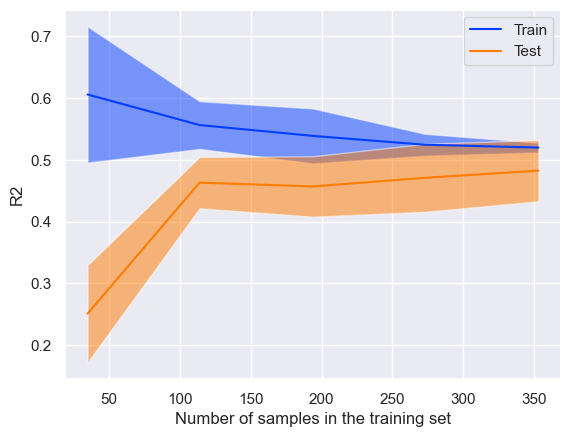

In [13]:
display_learning_curve = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores,
    test_scores=test_scores,
    score_name='R2'
)

display_learning_curve.plot()